In [3]:
import pandas as pd
import numpy as np
import glob

# For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine learning Model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Machine learning model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [14]:
#data prep


csv_files = {
    r"C:\Users\himan\OneDrive\Desktop\ML\DDos Attack Classifier\data\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv",
    r"C:\Users\himan\OneDrive\Desktop\ML\DDos Attack Classifier\data\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
    r"C:\Users\himan\OneDrive\Desktop\ML\DDos Attack Classifier\data\Friday-WorkingHours-Morning.pcap_ISCX.csv",
    r"C:\Users\himan\OneDrive\Desktop\ML\DDos Attack Classifier\data\Monday-WorkingHours.pcap_ISCX.csv",
    r"C:\Users\himan\OneDrive\Desktop\ML\DDos Attack Classifier\data\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
    r"C:\Users\himan\OneDrive\Desktop\ML\DDos Attack Classifier\data\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
    r"C:\Users\himan\OneDrive\Desktop\ML\DDos Attack Classifier\data\Tuesday-WorkingHours.pcap_ISCX.csv",
    r"C:\Users\himan\OneDrive\Desktop\ML\DDos Attack Classifier\data\Wednesday-workingHours.pcap_ISCX.csv"
}
# Read and concatenate all CSVs into a single DataFrame
df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# Now combined_df holds all data from the 7 CSV files
print(df.shape)
print(df.head())

(2830743, 79)
    Destination Port   Flow Duration   Total Fwd Packets  \
0              54865               3                   2   
1              55054             109                   1   
2              55055              52                   1   
3              46236              34                   1   
4              54863               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        1                            6   
2                        1                            6   
3                        1                            6   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             6                       6   
2                             6                       6   
3                             6   

In [15]:
# Remove the spaces before the column names
df.columns = df.columns.str.strip()

In [16]:

df.loc[:,'Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'DoS slowloris', 'DoS Slowhttptest',
       'DoS Hulk', 'DoS GoldenEye', 'Heartbleed', 'Bot',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'Infiltration', 'FTP-Patator',
       'SSH-Patator'], dtype=object)

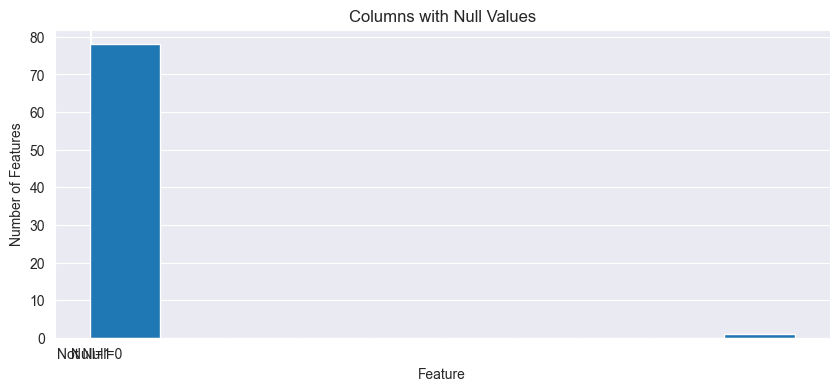

In [18]:
# Checking the null values in the dataset
plt.figure(1, figsize=(10, 4))
plt.hist(df.isna().sum())

# Set the title and axis labels
plt.xticks([0, 1], labels=['Not Null=0', 'Null=1'])
plt.title('Columns with Null Values')
plt.xlabel('Feature')
plt.ylabel('Number of Features')

# Show the plot
plt.show()

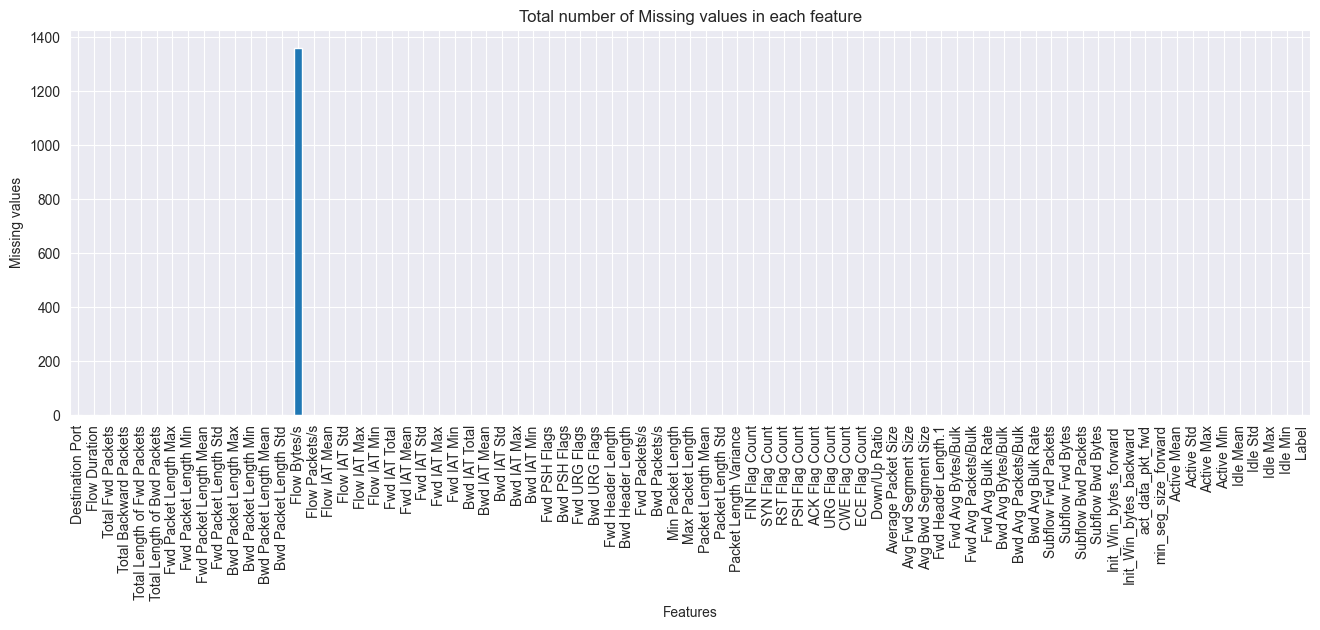

In [19]:
def plotMissingValues(dataframe):
    missing_values = dataframe.isnull().sum()  # Counting null values for each column
    fig = plt.figure(figsize=(16, 5))
    missing_values.plot(kind='bar')
    plt.xlabel("Features")
    plt.ylabel("Missing values")
    plt.title("Total number of Missing values in each feature")
    plt.show()

plotMissingValues(df)

In [20]:
## Removing the null values
data_f=df.dropna()

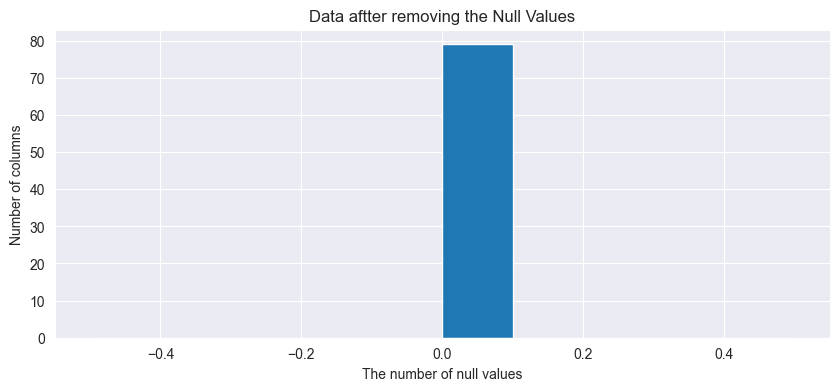

In [21]:
#Checking the null values in the dataset.
plt.figure(1,figsize=( 10,4))
plt.hist( data_f.isna().sum())
# Set the title and axis labels
plt.title('Data aftter removing the Null Values')
plt.xlabel('The number of null values')
plt.ylabel('Number of columns')

# Show the plot
plt.show()

In [23]:
data_f = data_f.replace([np.inf, -np.inf], np.nan)  # Convert inf to NaN
null_values = data_f.isnull().sum()  # Check for NaN values

In [24]:
(data_f.dtypes=='object')

Destination Port               False
Flow Duration                  False
Total Fwd Packets              False
Total Backward Packets         False
Total Length of Fwd Packets    False
                               ...  
Idle Mean                      False
Idle Std                       False
Idle Max                       False
Idle Min                       False
Label                           True
Length: 79, dtype: bool

In [36]:
df.loc[:,'Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'DoS slowloris', 'DoS Slowhttptest',
       'DoS Hulk', 'DoS GoldenEye', 'Heartbleed', 'Bot',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'Infiltration', 'FTP-Patator',
       'SSH-Patator'], dtype=object)

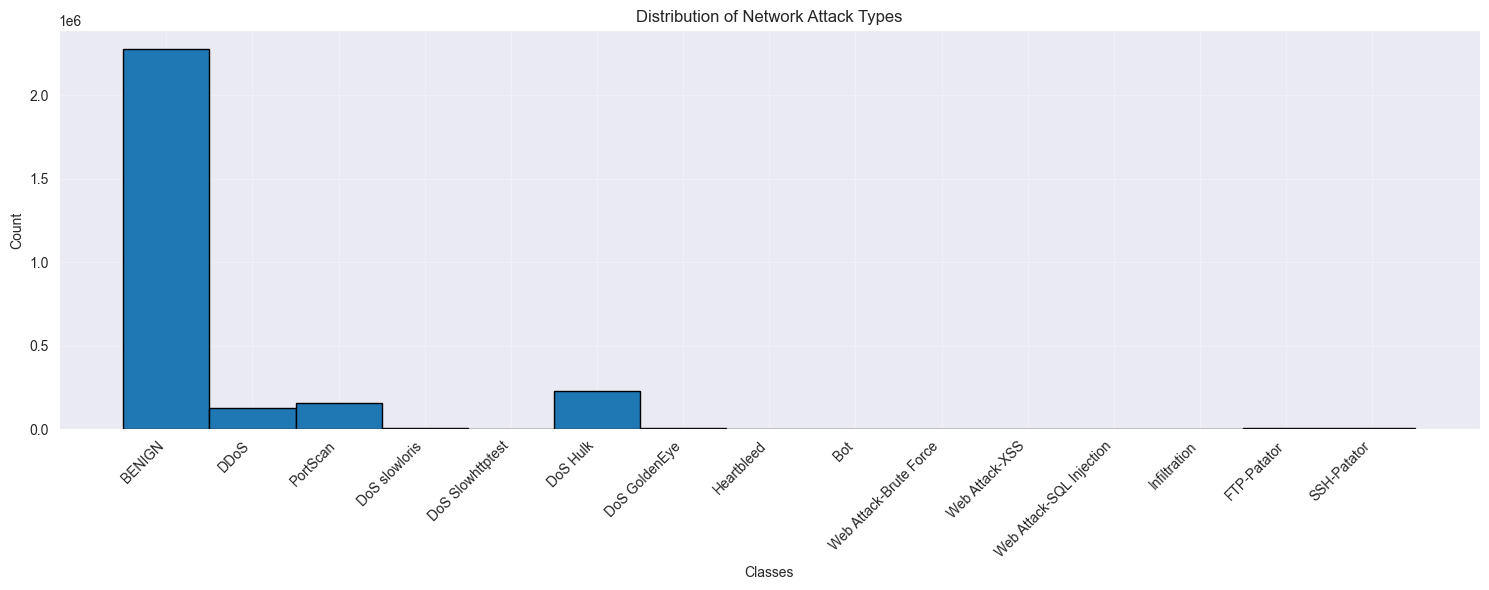


Distribution of attack types:
Label_mapped
0     2273097
1      128027
2      158930
3        5796
4        5499
5      231073
6       10293
7          11
8        1966
9        1507
10        652
11         21
12         36
13       7938
14       5897
Name: count, dtype: int64


In [48]:
# Use df instead of data_f for the mapping
df['Label_mapped'] = df['Label'].map({
    'BENIGN': 0, 'DDoS': 1, 'PortScan': 2, 'DoS slowloris': 3,
    'DoS Slowhttptest': 4, 'DoS Hulk': 5, 'DoS GoldenEye': 6, 
    'Heartbleed': 7, 'Bot': 8, 'Web Attack � Brute Force': 9, 
    'Web Attack � XSS': 10, 'Web Attack � Sql Injection': 11,
    'Infiltration': 12, 'FTP-Patator': 13, 'SSH-Patator': 14
})

# Create the histogram
plt.figure(figsize=(15, 6))

plt.hist(df['Label_mapped'], 
         bins=np.arange(-0.5, 15.5, 1),  # Creates bins for each class
         edgecolor='black')

plt.xticks(range(15), [
    'BENIGN', 'DDoS', 'PortScan', 'DoS slowloris',
    'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 
    'Heartbleed', 'Bot', 'Web Attack-Brute Force',
    'Web Attack-XSS', 'Web Attack-SQL Injection',
    'Infiltration', 'FTP-Patator', 'SSH-Patator'
], rotation=45, ha='right')

plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Distribution of Network Attack Types")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print the distribution
print("\nDistribution of attack types:")
print(df['Label_mapped'].value_counts().sort_index())

In [38]:
df.describe()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label_mapped
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,...,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06,6.799264e-01
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,...,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07,1.739081e+00
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,...,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,...,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08,1.400000e+01


In [50]:
# First, let's check the data types of your columns
print("Column data types:")
print(df.dtypes)

# Filter for only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("\nNumeric columns:")
print(numeric_cols)

# Now check infinite values only in numeric columns
print("\nBefore cleaning:")
print("Number of infinite values in numeric columns:", 
      np.isinf(df[numeric_cols].values).sum())
print("Number of NaN values:", df.isna().sum().sum())

# Clean the data
# 1. Replace infinite values with NaN in numeric columns
df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], np.nan)

# 2. Drop rows with NaN values
df = df.dropna()

# Verify the cleaning
print("\nAfter cleaning:")
print("Number of infinite values in numeric columns:", 
      np.isinf(df[numeric_cols].values).sum())
print("Number of NaN values:", df.isna().sum().sum())
print("Remaining rows:", len(df))

Column data types:
Destination Port                 int64
Flow Duration                    int64
Total Fwd Packets                int64
Total Backward Packets           int64
Total Length of Fwd Packets      int64
                                ...   
Idle Std                       float64
Idle Max                         int64
Idle Min                         int64
Label                           object
Label_mapped                     int64
Length: 80, dtype: object

Numeric columns:
Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
     

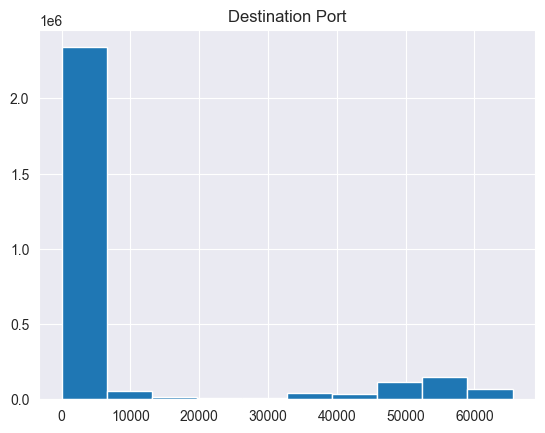

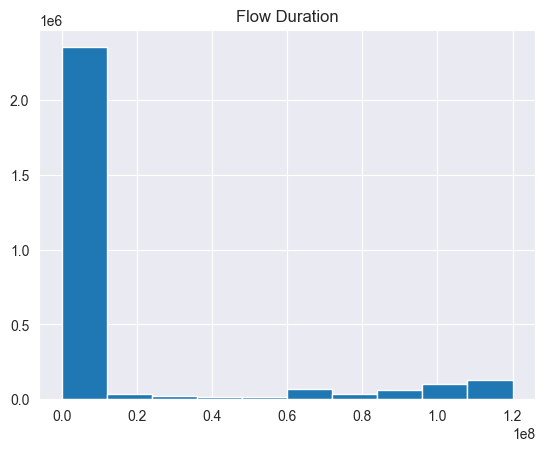

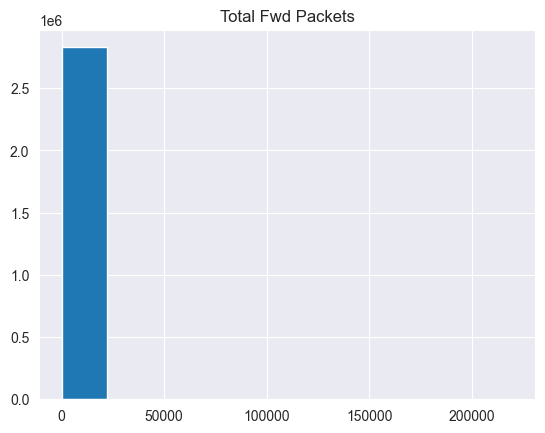

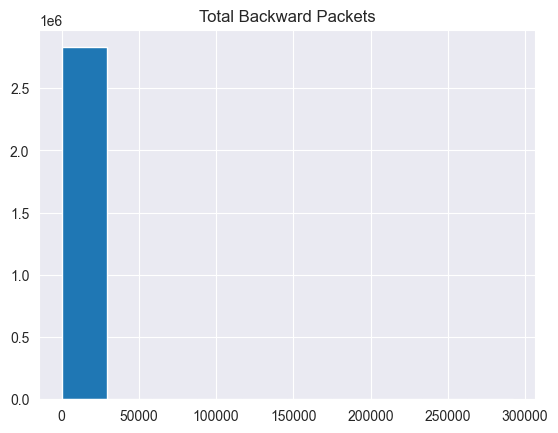

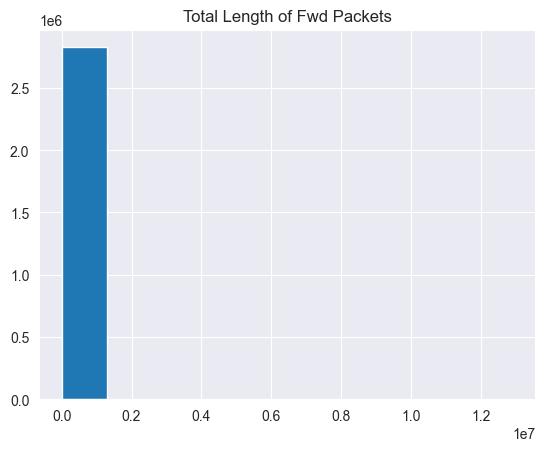

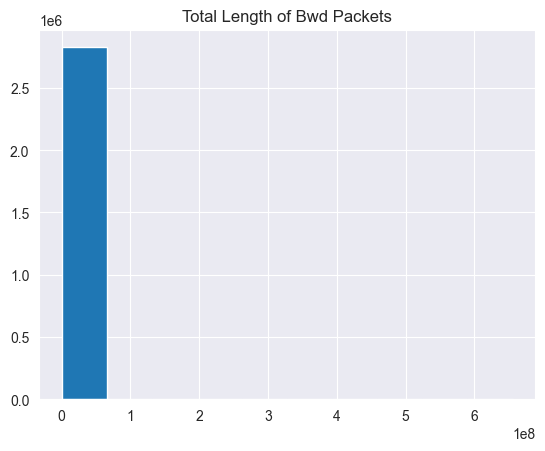

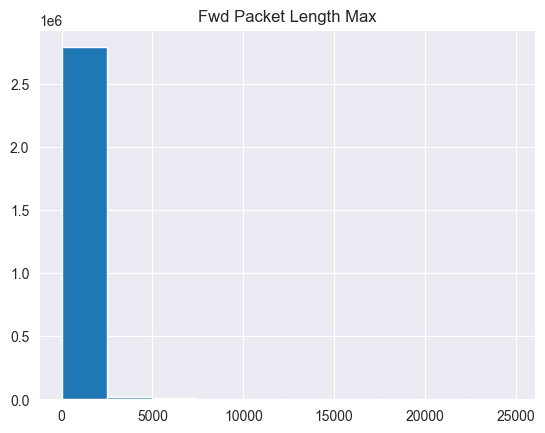

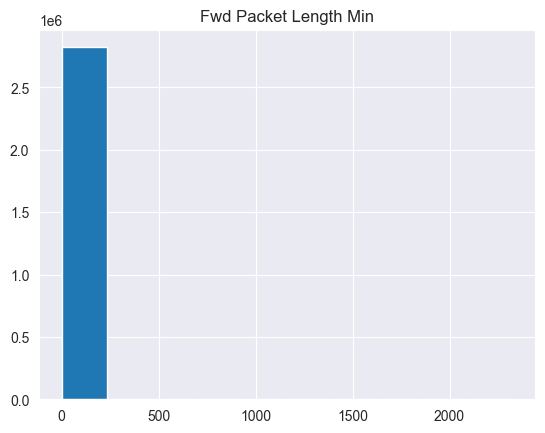

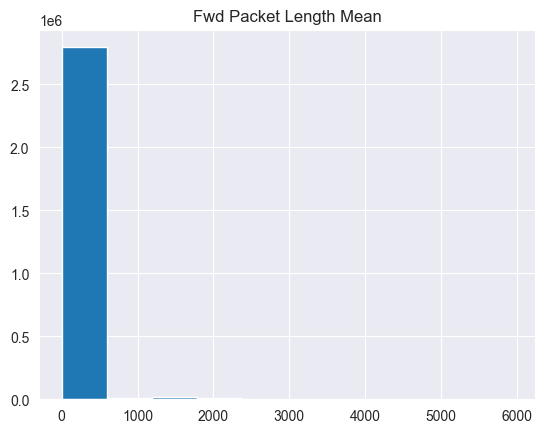

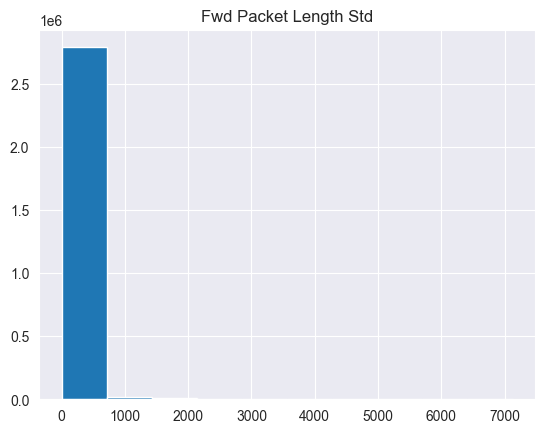

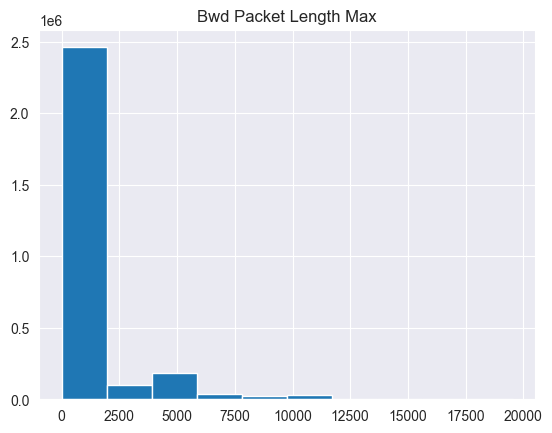

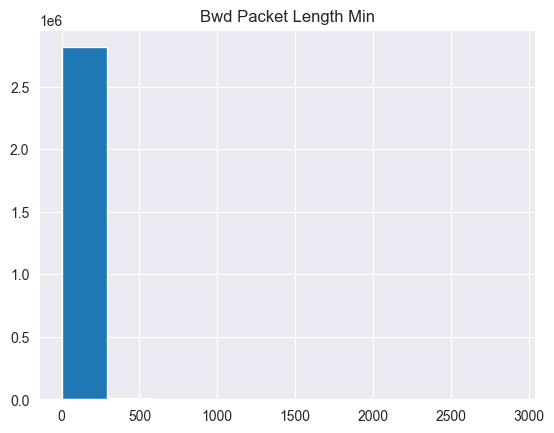

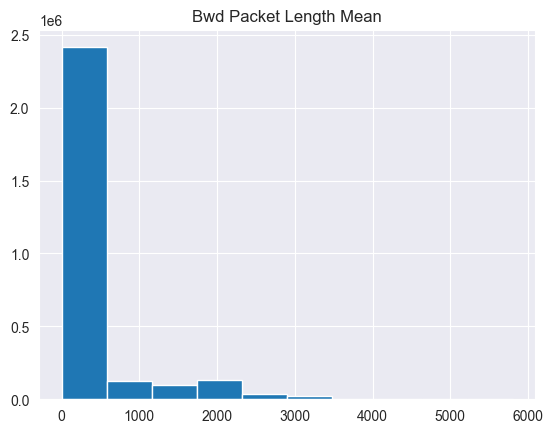

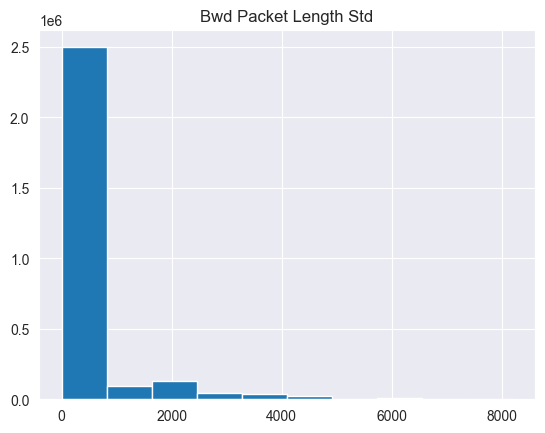

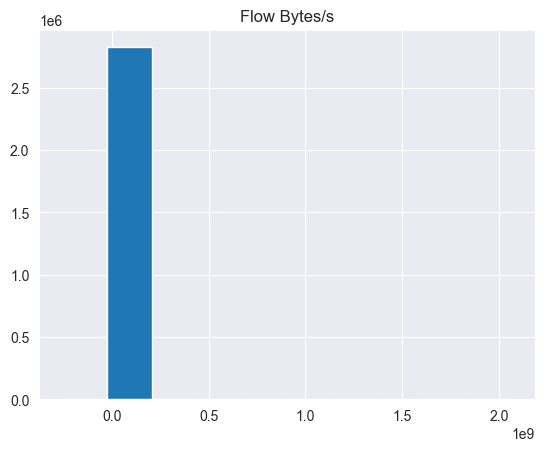

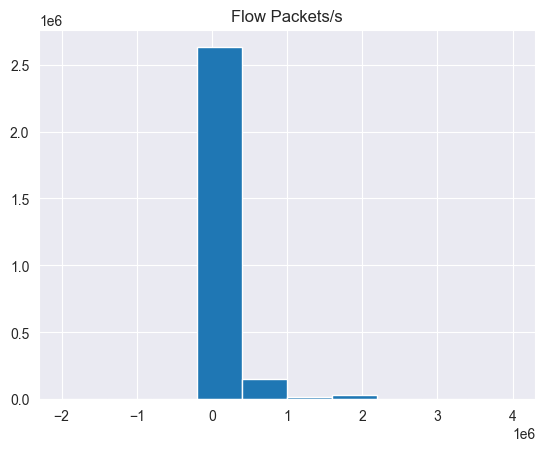

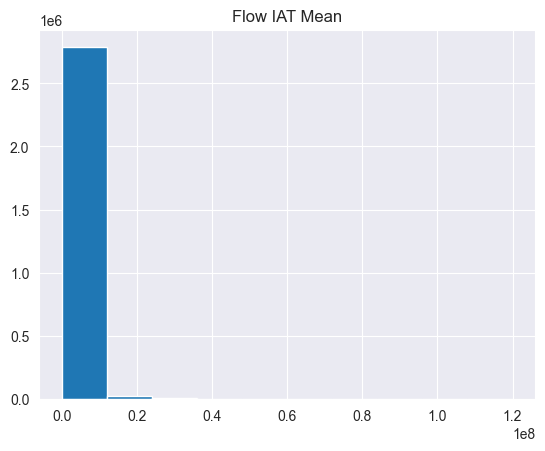

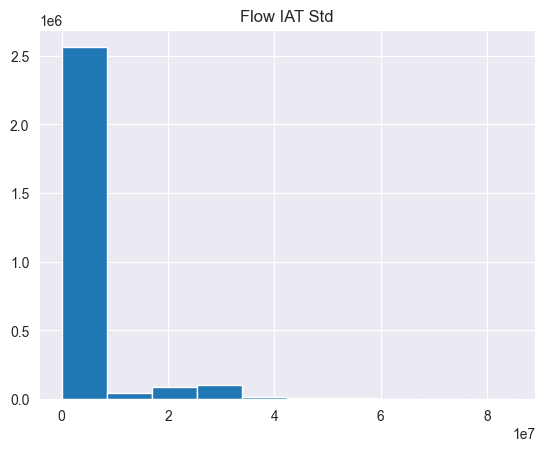

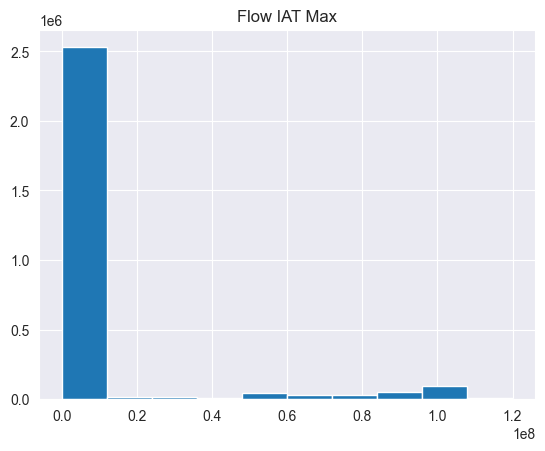

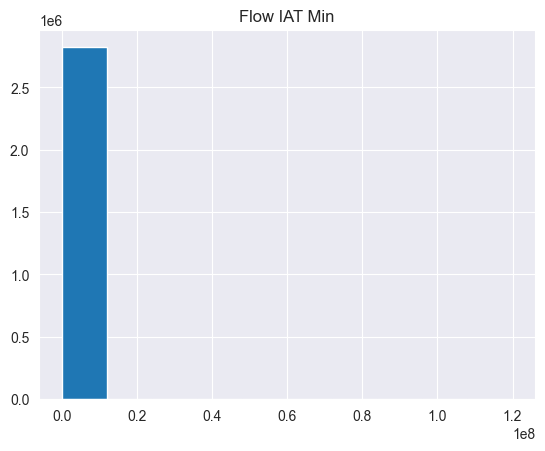

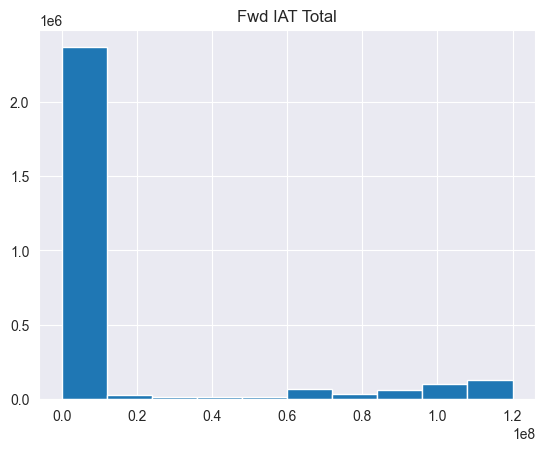

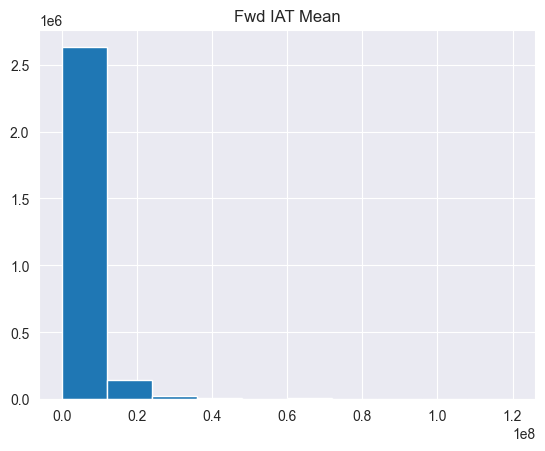

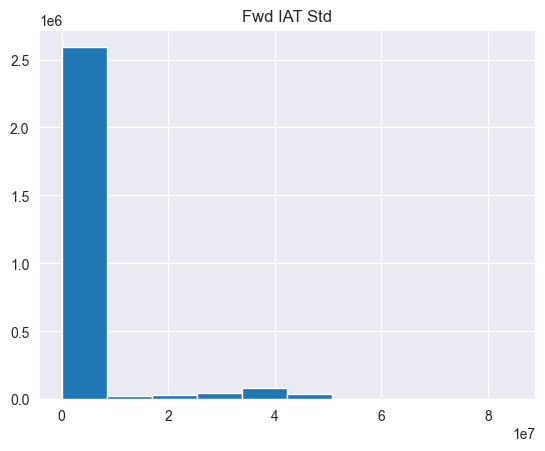

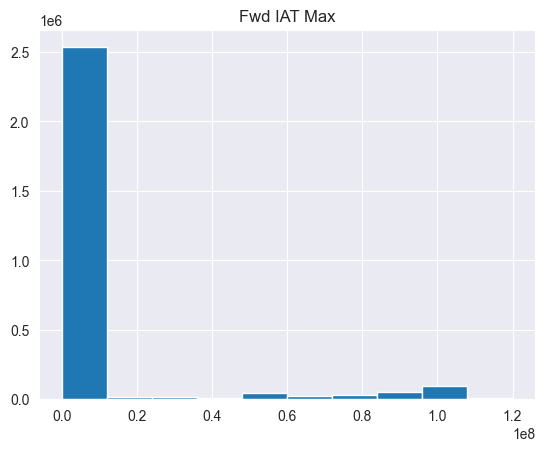

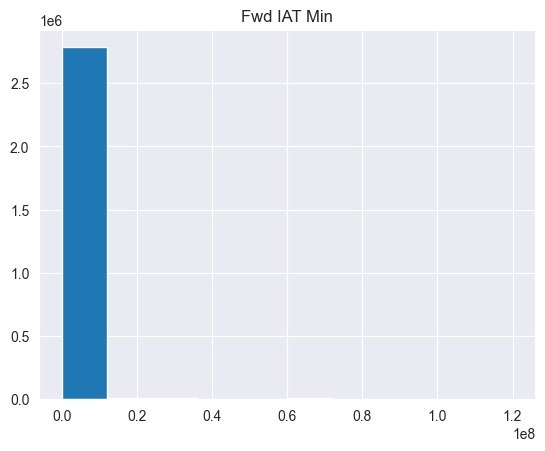

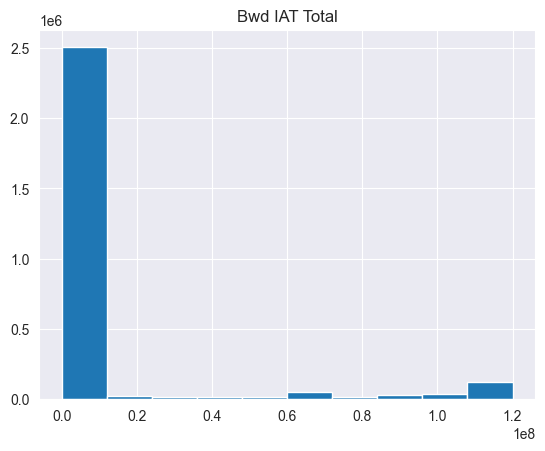

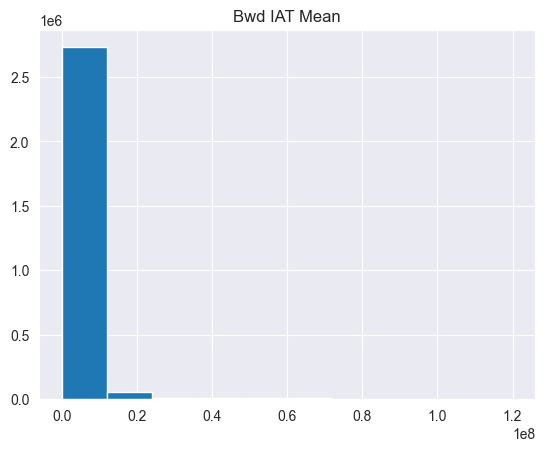

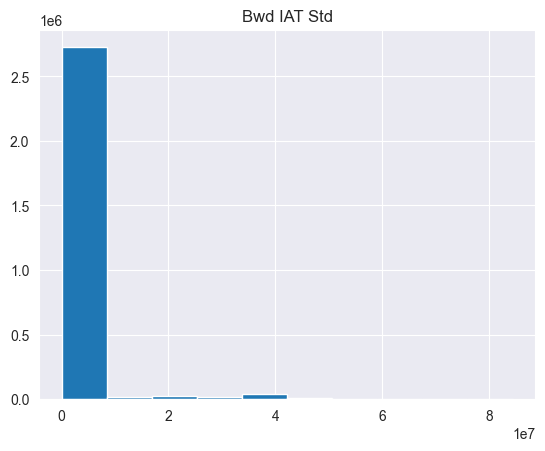

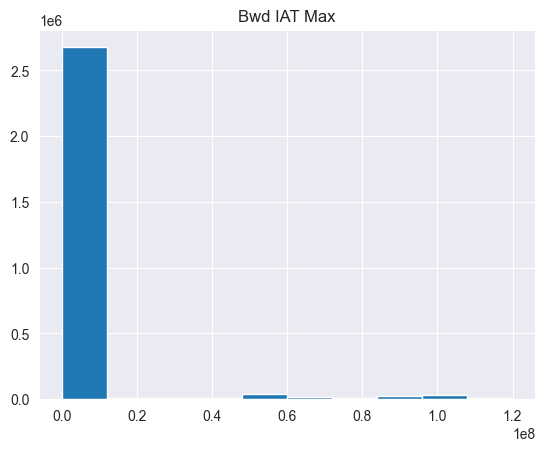

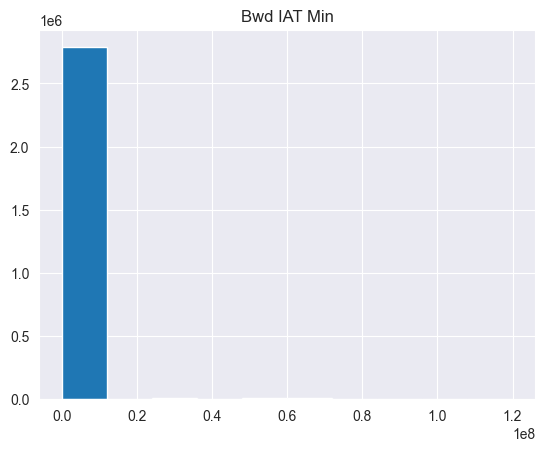

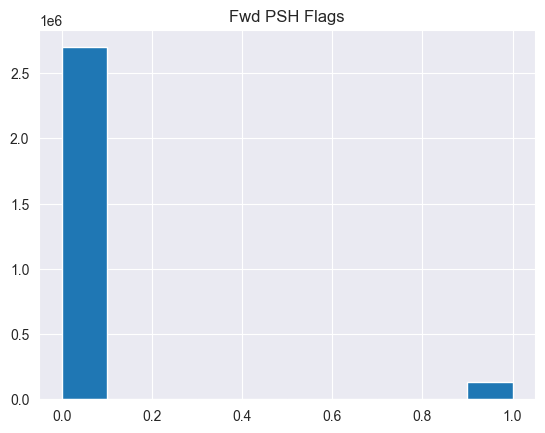

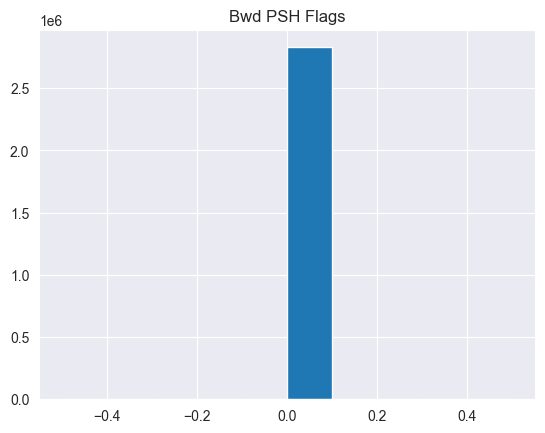

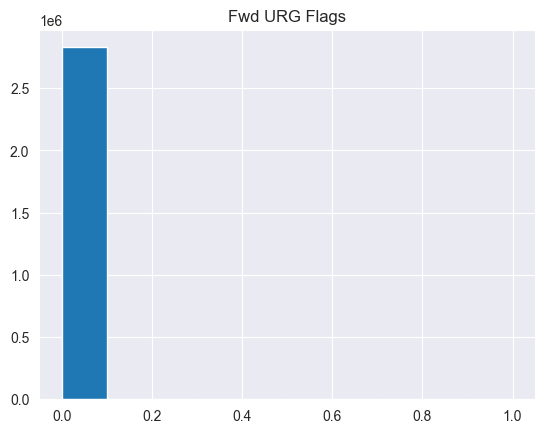

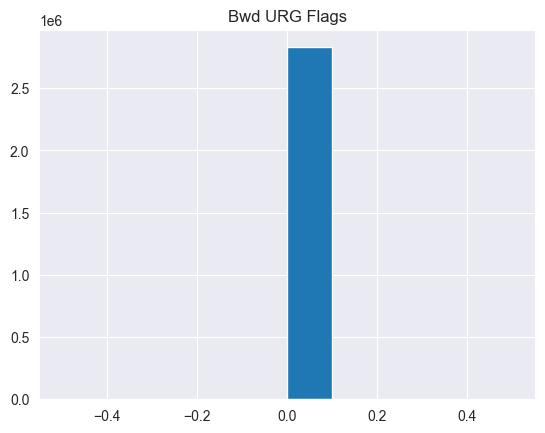

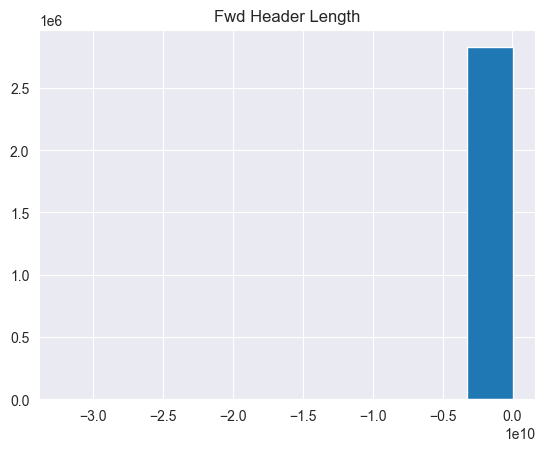

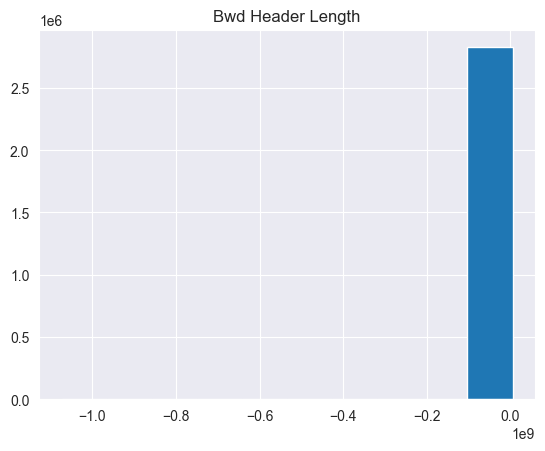

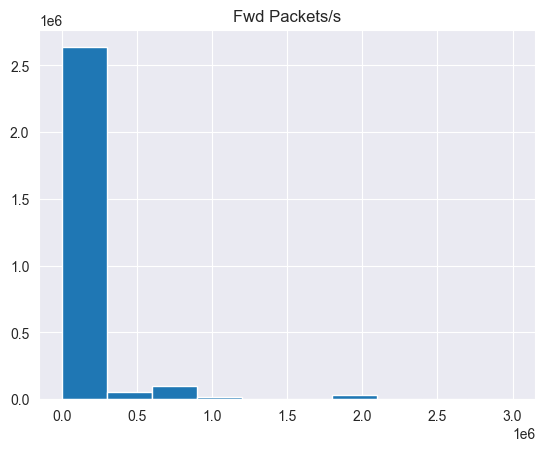

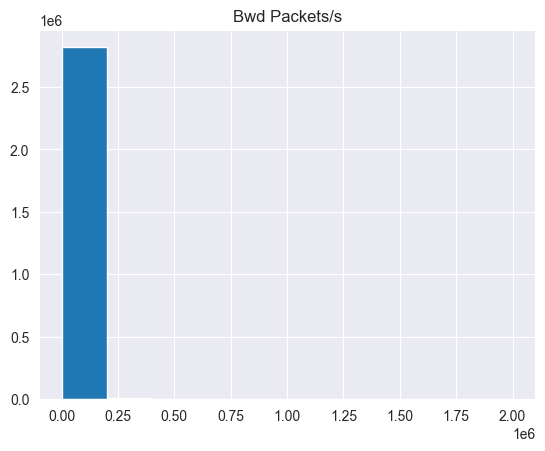

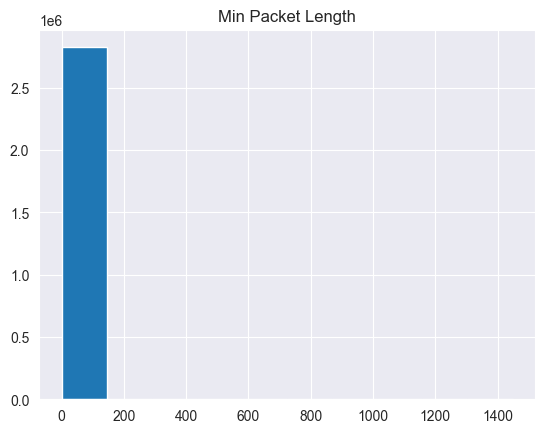

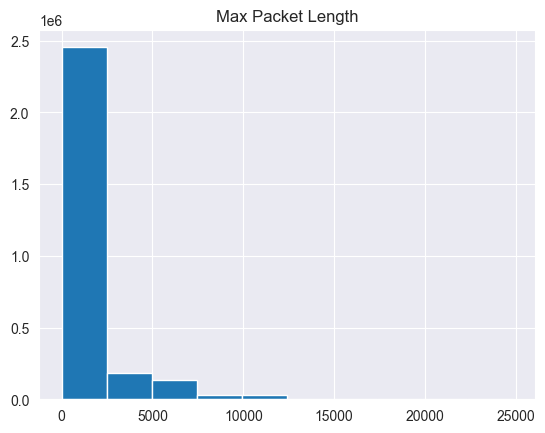

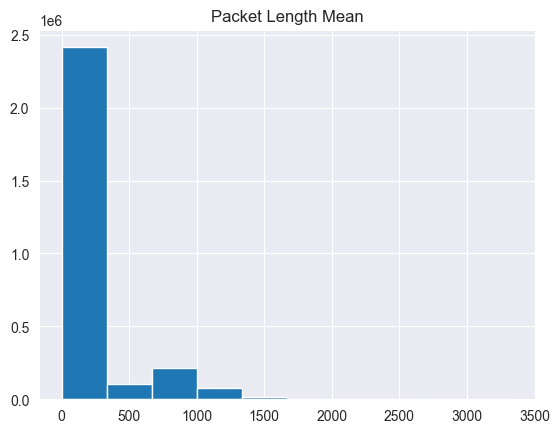

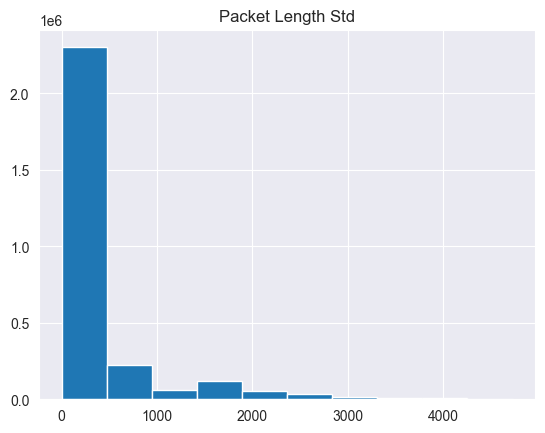

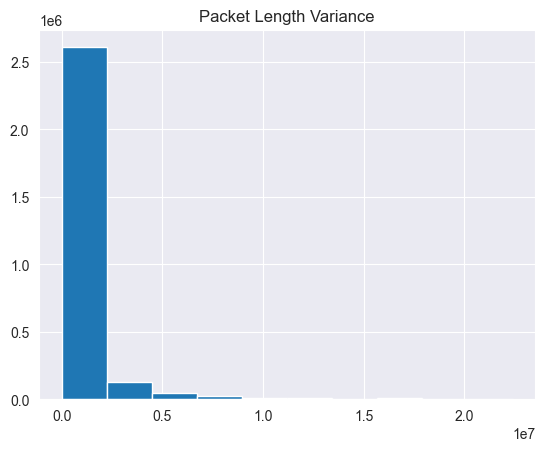

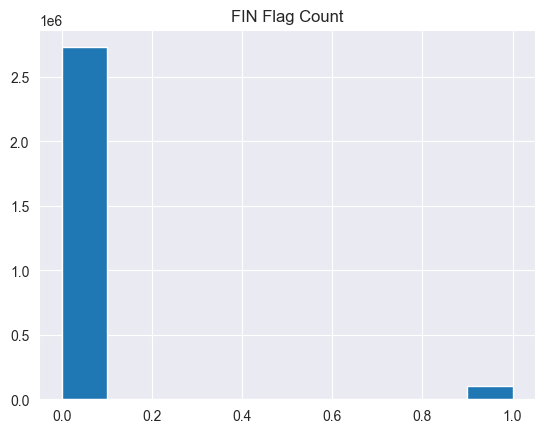

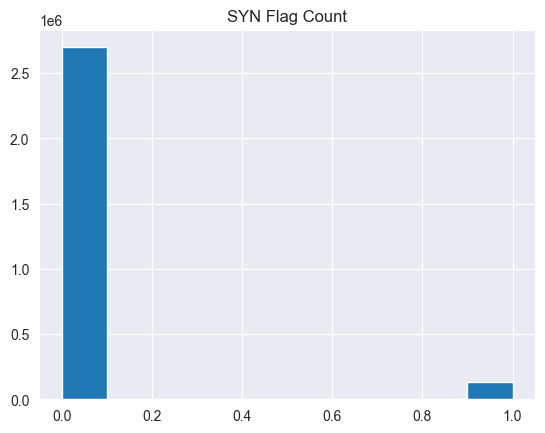

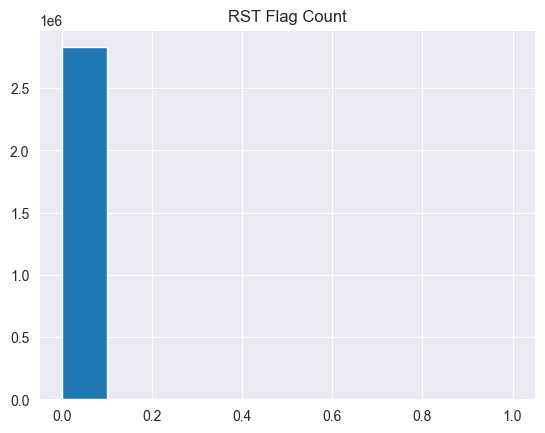

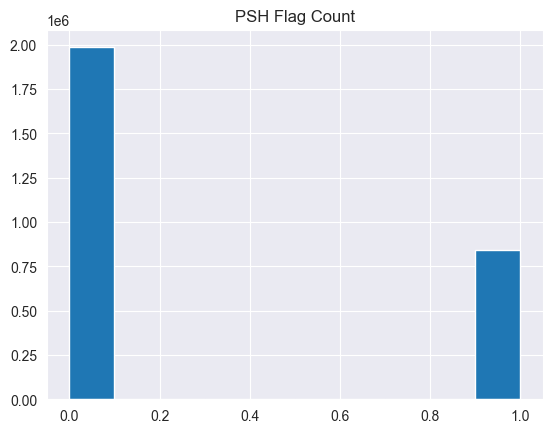

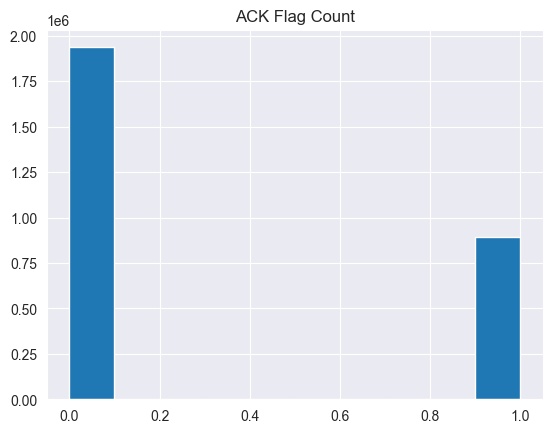

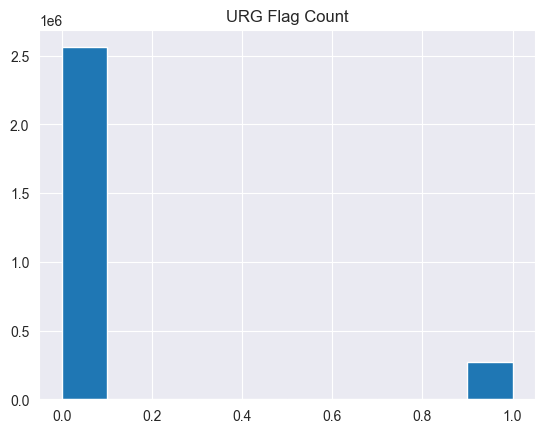

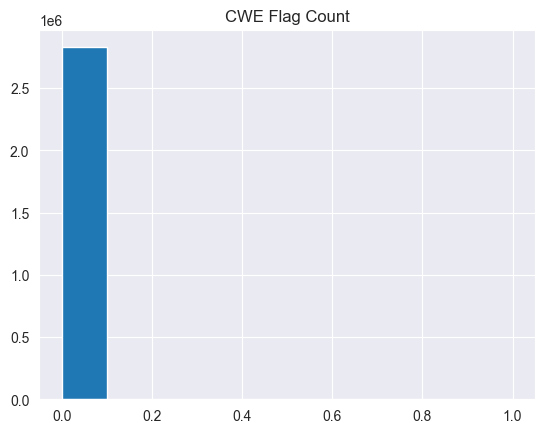

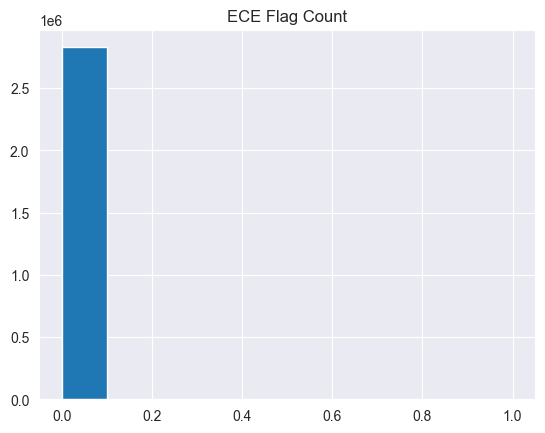

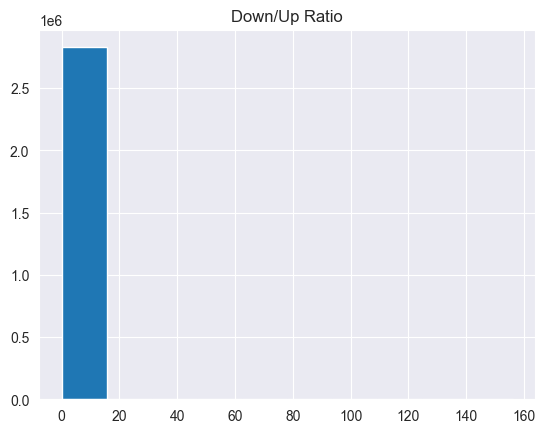

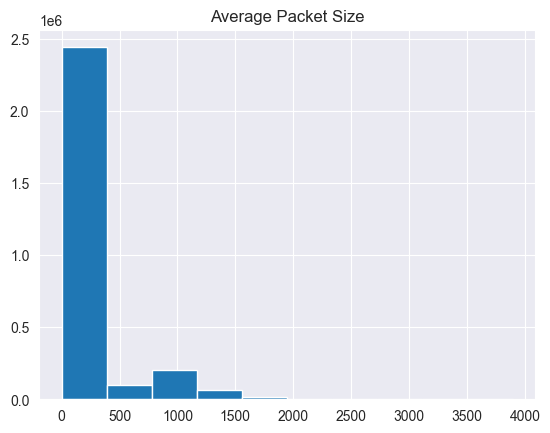

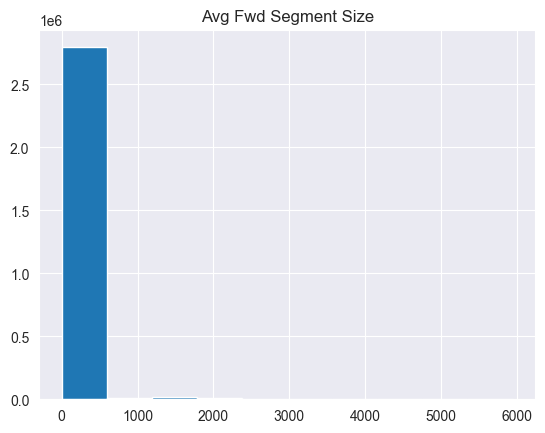

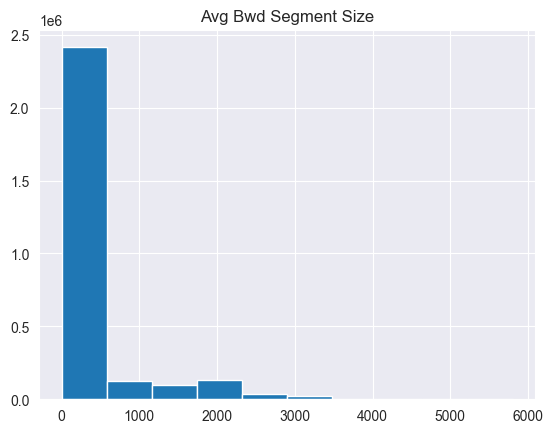

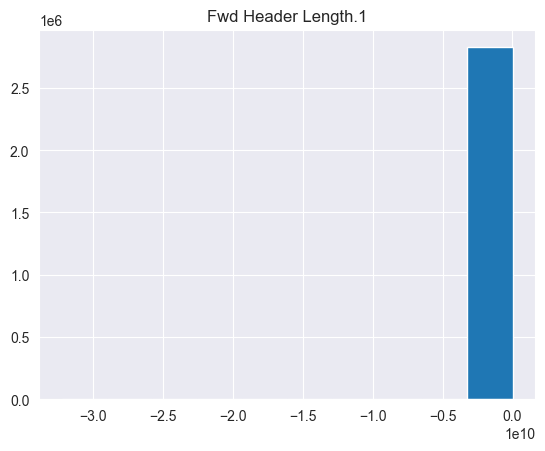

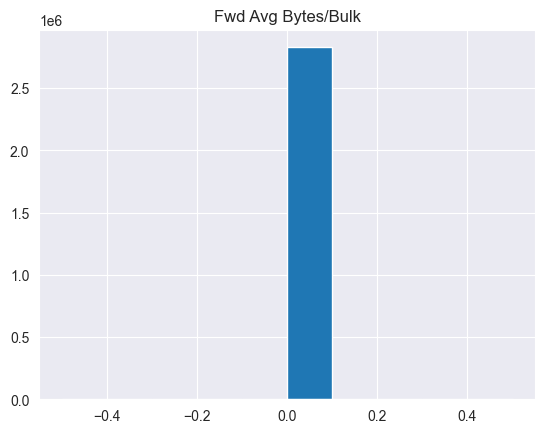

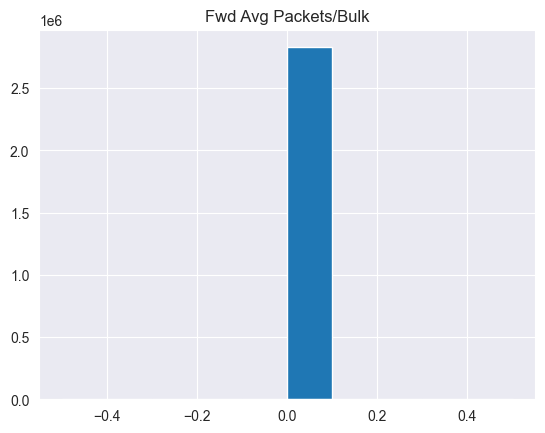

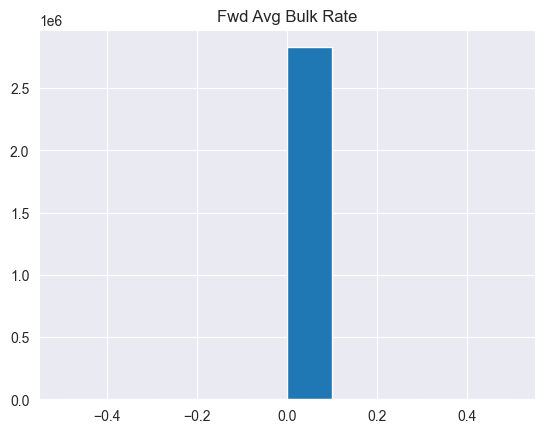

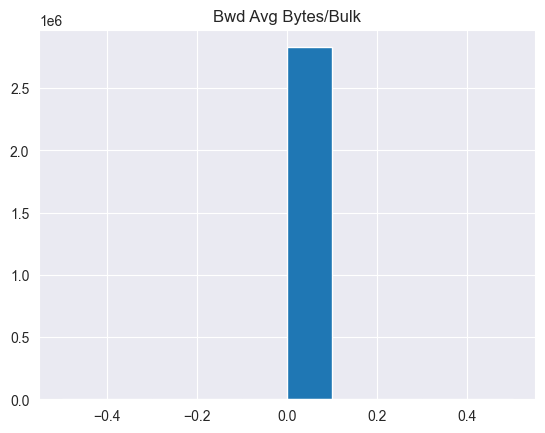

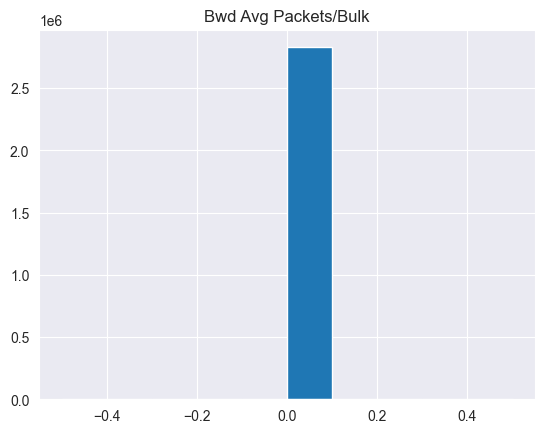

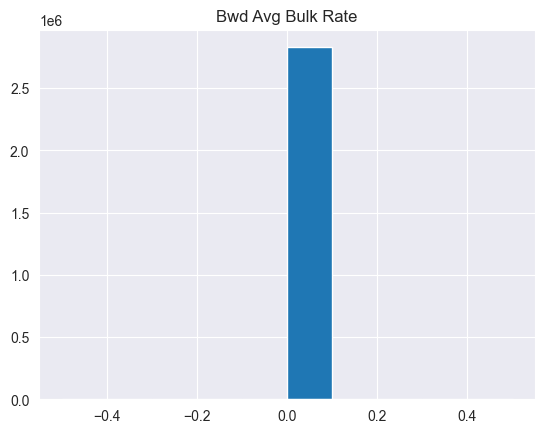

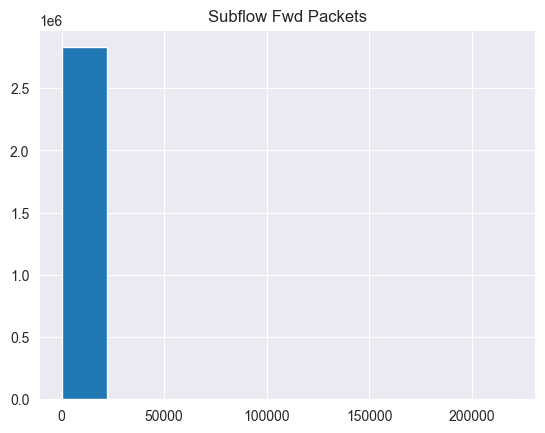

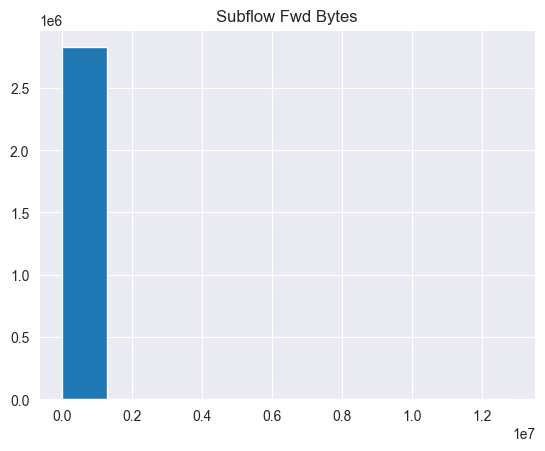

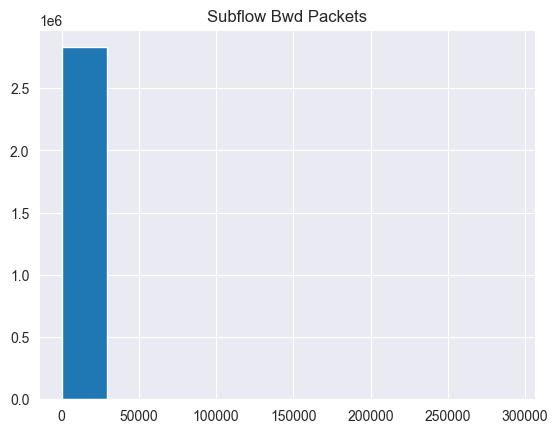

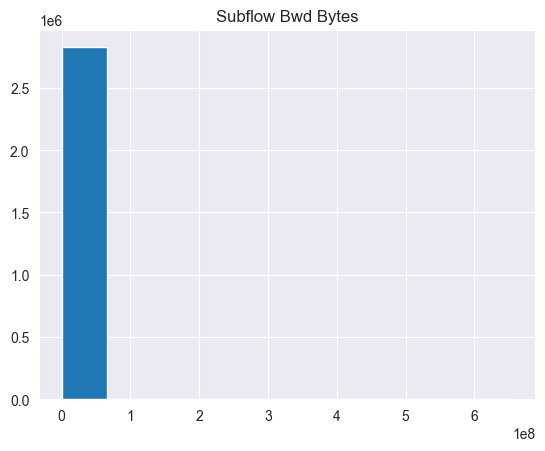

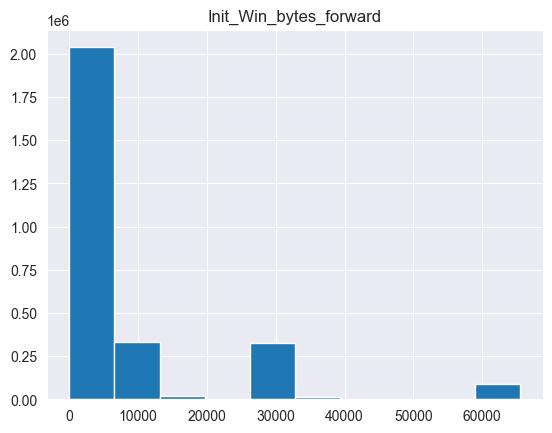

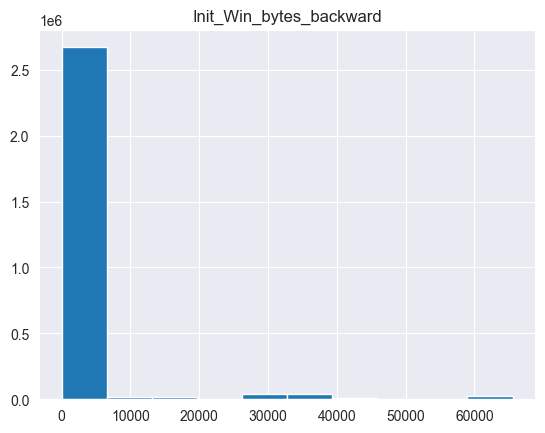

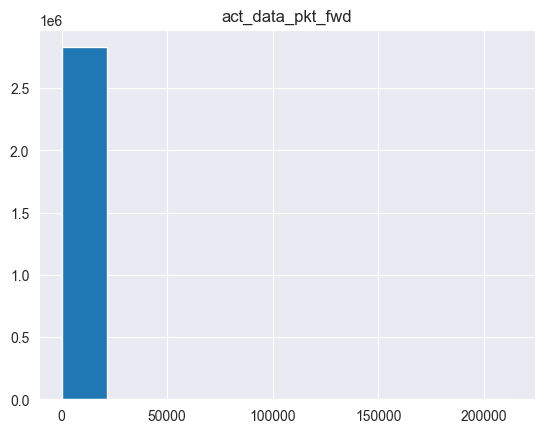

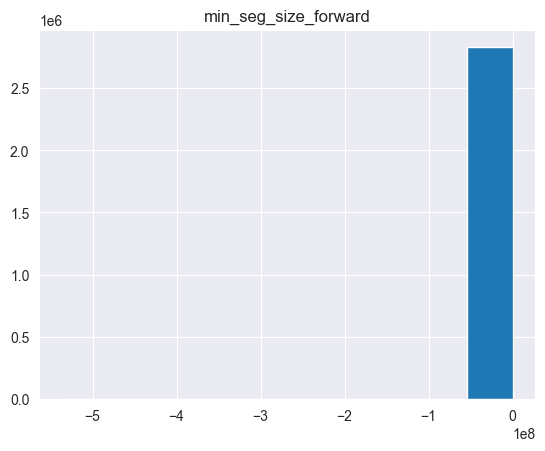

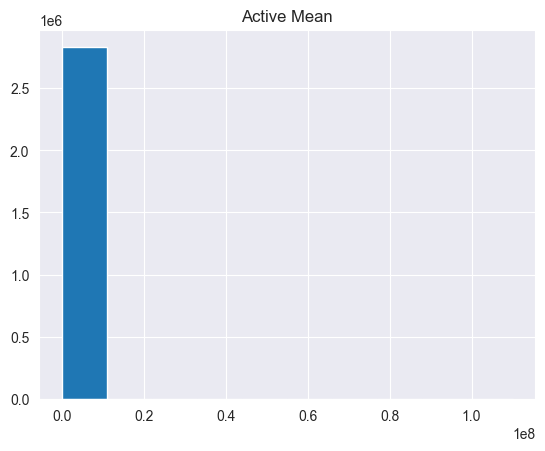

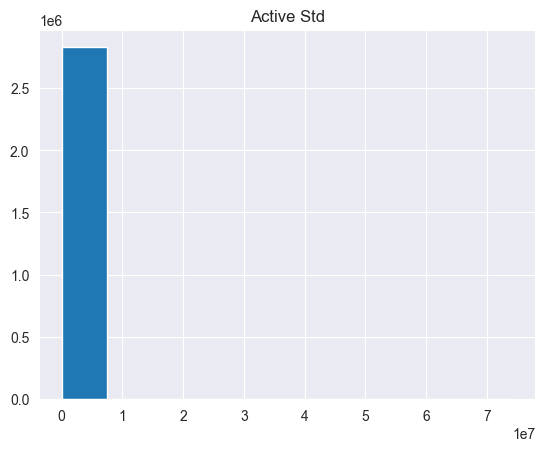

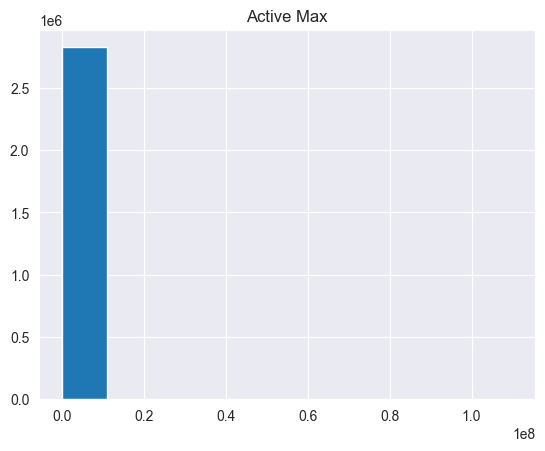

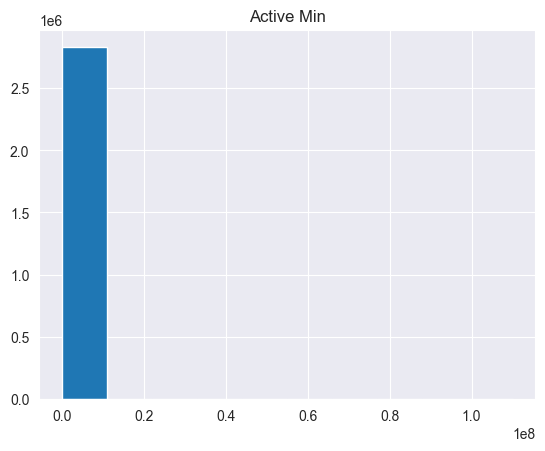

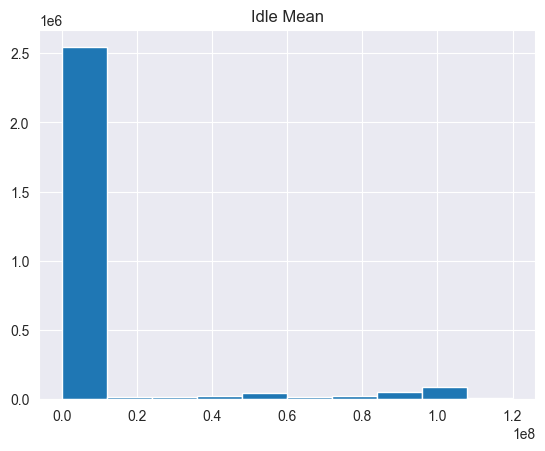

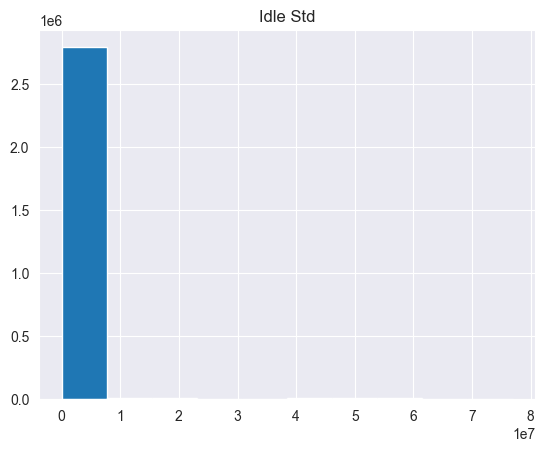

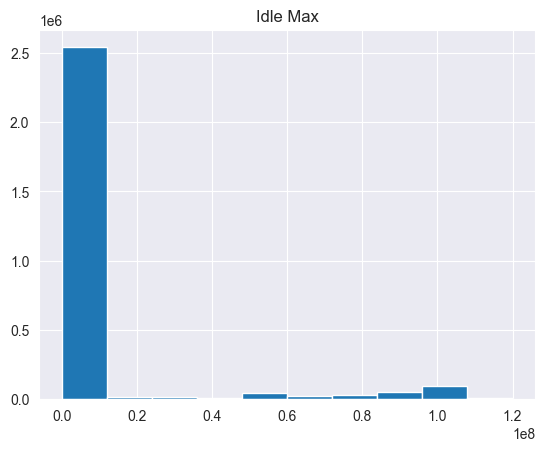

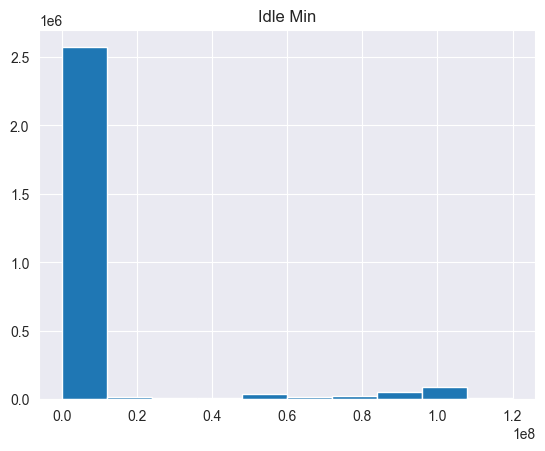

C:\Users\himan\AppData\Local\JetBrains\PyCharm2024.2\demo\PyCharmLearningProject\venv\Lib\site-packages\matplotlib\axes\_axes.py:7065: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\himan\AppData\Local\JetBrains\PyCharm2024.2\demo\PyCharmLearningProject\venv\Lib\site-packages\matplotlib\axes\_axes.py:7066: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

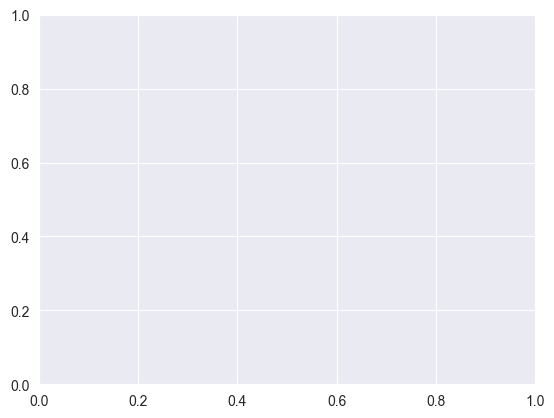

In [51]:
# Create a histogram plot for each feature
plt.figure(5)
for col in data_f.columns:
    plt.hist(data_f[col])
    plt.title(col)
    plt.show()

In [52]:
#splitting data in tran and test 

In [53]:
# Split data into features and target variable
X = df.drop('Label', axis=1)
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [55]:
print("The train dataset size = ",X_train.shape)
print("The test dataset size = ",X_test.shape)

The train dataset size =  (1979513, 79)
The test dataset size =  (848363, 79)


In [56]:
#traning random forest classier model

rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

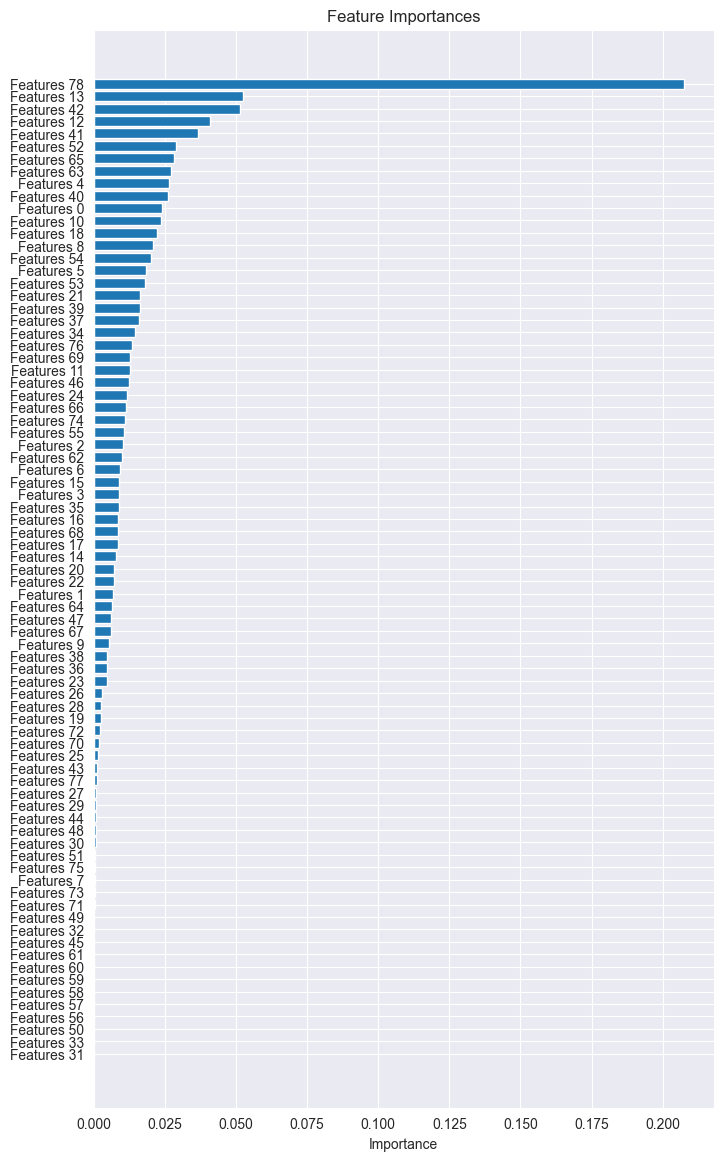

In [57]:
# Getting feature importances from the trained model
importances = rf_model.feature_importances_

# Getting the indices of features sorted by importance
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=False)
feature_names = [f"Features {i}" for i in indices]  # Replace with your column names

# Plotting feature importances horizontally
plt.figure(figsize=(8, 14))
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_names)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()

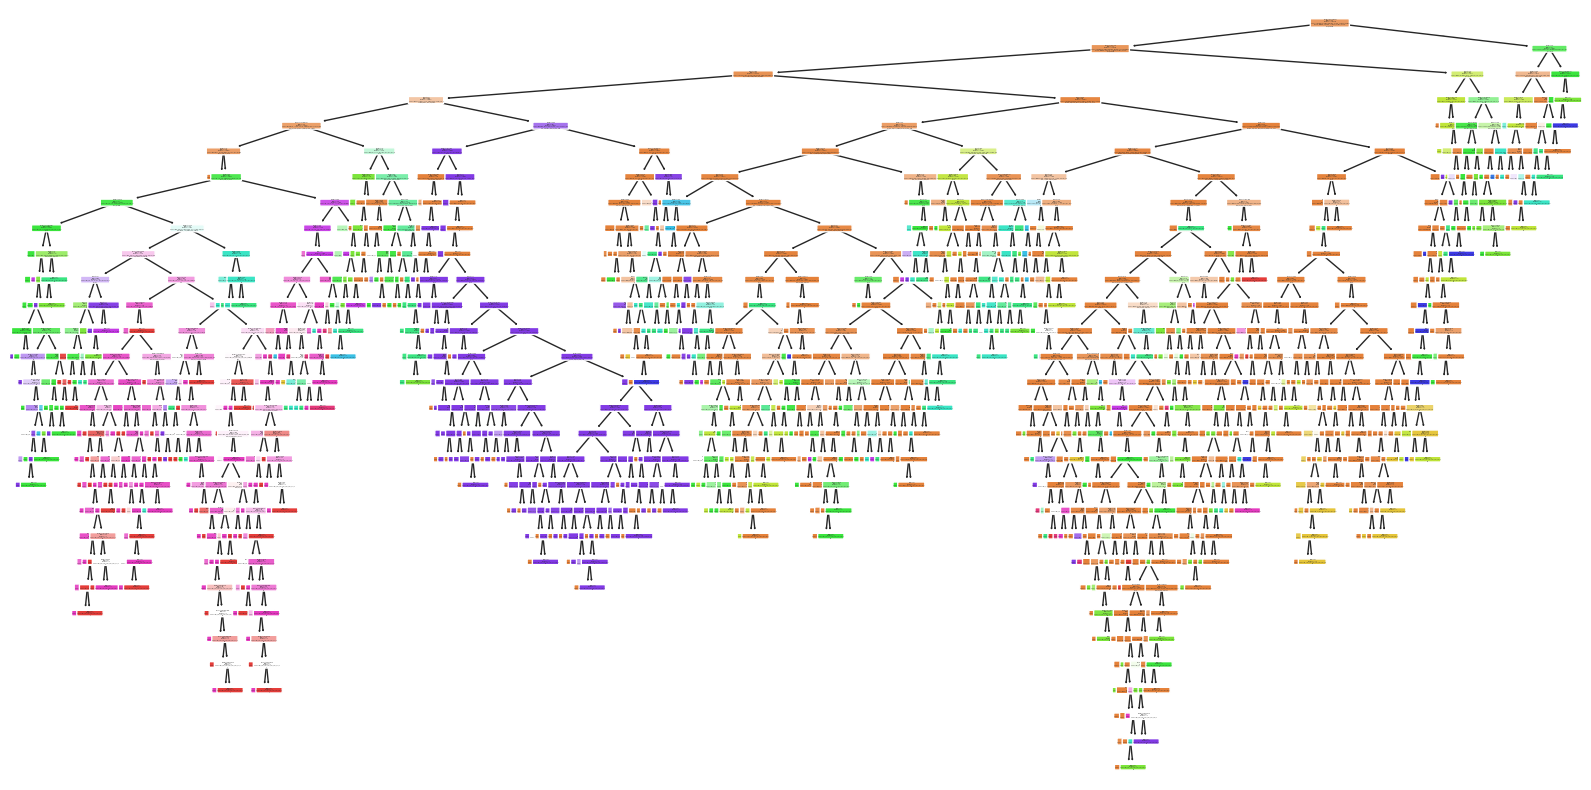

In [58]:
from sklearn.tree import plot_tree

estimator = rf_model.estimators_[0]  # Selecting the first estimator from the random forest model


plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, rounded=True)
plt.show()

In [59]:
# Function to generate and display a detailed confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [62]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')

print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')

# Print detailed report for all classes
print('\nDetailed Classification Report:')
print(classification_report(y_test, rf_pred))


Random Forest Metrics:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000

Detailed Classification Report:
                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    681388
                       Bot       1.00      1.00      1.00       632
                      DDoS       1.00      1.00      1.00     38307
             DoS GoldenEye       1.00      1.00      1.00      3031
                  DoS Hulk       1.00      1.00      1.00     68931
          DoS Slowhttptest       1.00      1.00      1.00      1697
             DoS slowloris       1.00      1.00      1.00      1763
               FTP-Patator       1.00      1.00      1.00      2393
                Heartbleed       1.00      1.00      1.00         7
              Infiltration       1.00      0.90      0.95        10
                  PortScan       1.00      1.00      1.00     47836
               SSH-Patator       1.00      1.00      1.00  

In [66]:
#logistic regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000002BD36E1FAA0>>
Traceback (most recent call last):
  File "C:\Users\himan\AppData\Local\JetBrains\PyCharm2024.2\demo\PyCharmLearningProject\venv\Lib\site-packages\ipykernel\ipkernel.py", line 790, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
                                                 ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\threading.py", line 1535, in enumerate
    def enumerate():
    
KeyboardInterrupt: 
Exception ignored in: 'zmq.backend.cython._zmq.Frame.__del__'
Traceback (most recent call last):
  File "_zmq.py", line 160, in zmq.backend.cython._zmq._check_rc
KeyboardInterrupt: 


KeyboardInterrupt: 